In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
import sys
sys.path.append('/Users/alenastern/Documents/Spring2018/Machine_Learning/Machine_Learning_Public_Policy/hws/hw2')
import numpy as np
import explore as ex
import preprocess as pp
import getfeatures as gf
import evalmodel as em
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
%load_ext autoreload
%autoreload 2

/Users/alenastern/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Read in Data

In [4]:
outcomes = ex.read_data("data/outcomes.csv")
projects = ex.read_data("data/projects.csv")

In [16]:
projects['date_posted'] = pd.to_datetime(projects['date_posted'])

In [30]:
outcomes = outcomes[['projectid', 'is_exciting']]

In [20]:
X = projects[(projects['date_posted'].dt.year >= 2011) & (projects['date_posted'].dt.year <= 2013)]

In [31]:
Y = outcomes[outcomes['projectid'].isin(X['projectid'])]

In [32]:
total_data = pd.merge(X, Y, on = 'projectid')

# Explore Data

In [34]:
ex.dist_table(total_data)

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
count,3.282930e+05,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353050.000000
mean,2.503127e+11,36.868563,-95.398318,56301.763713,32.220311,531.372372,625.143964,94.187169
std,1.648173e+11,4.927417,18.118360,31043.523511,2.484309,844.069364,993.022780,156.987405
min,1.000050e+10,18.249140,-171.690554,410.000000,30.000000,37.030000,43.560000,1.000000
25%,6.372301e+10,33.916387,-117.246823,29388.000000,30.000000,288.750000,339.710000,23.000000
50%,2.400090e+11,36.675826,-89.886438,60613.000000,30.000000,427.270000,502.670000,31.000000
75%,3.904440e+11,40.680488,-80.761902,90007.000000,35.000000,606.720000,713.790000,100.000000
max,6.100008e+11,67.258157,-66.628036,99926.000000,35.000000,139725.410000,164382.840000,12143.000000


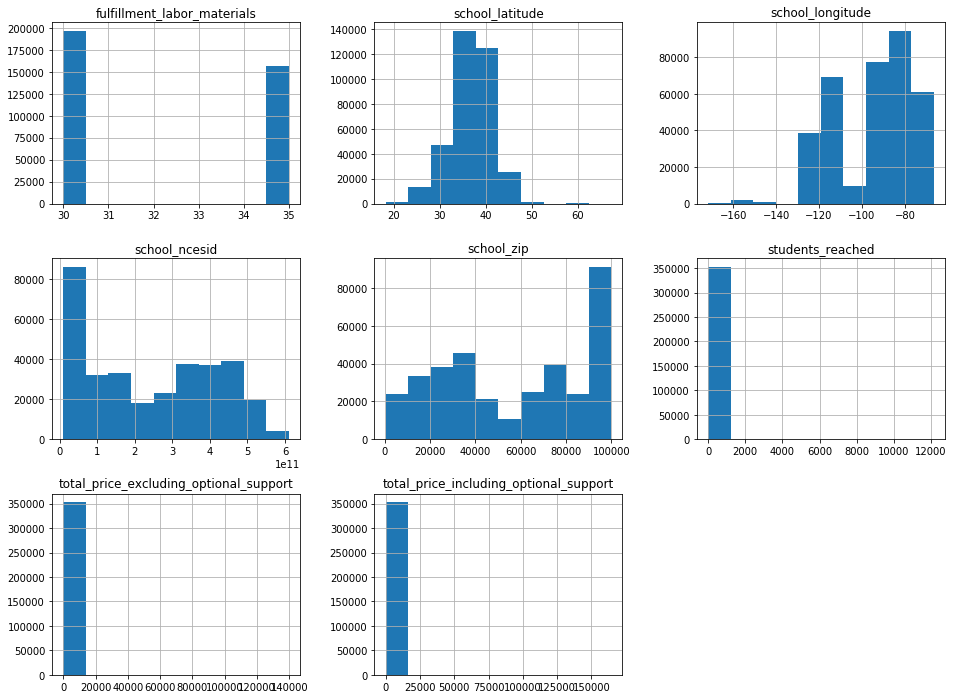

In [35]:
ex.dist_plot(total_data)

In [ ]:
ex.plot_by_class(total_data, "is_exciting")

KeyboardInterrupt: 

In [ ]:
corr_table = ex.corr_table(total_data)
ex.plot_y_corr(corr_table, "is_exciting")

In [ ]:
ex.plot_corr_matrix(corr_table)